<a href="https://colab.research.google.com/github/Gops03/TEORIA_DE_SE-ALES/blob/main/RED_NEURONAL_AUDIOSIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import welch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Montar Google Drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Función para cargar y preprocesar audios
def audio_matrix(path, scaler):
    fs_v = []
    audio_m = []

    for file in os.listdir(path):
        file_path = os.path.join(path, file)

        y, sr = librosa.load(file_path, sr=None)
        y = librosa.to_mono(y)
        y = y.reshape(-1, 1)
        y = scaler.fit_transform(y)
        y = y.flatten()

        fs_v.append(sr)
        audio_m.append(y)

    fs = np.mean(fs_v)
    max_length = max(len(y) for y in audio_m)
    audio_m_padded = np.array([np.pad(y, (0, max_length - len(y)), 'constant') for y in audio_m])

    return audio_m_padded, fs

In [ ]:
# Definir ruta y cargar los audios
path = r'/content/drive/My Drive/TDS/ANEaudios'
scaler = MinMaxScaler(feature_range=(-1, 1))
audio_m, fs = audio_matrix(path, scaler)

# Cargar archivo Excel
df = pd.read_excel('/content/drive/My Drive/TDS/Audios.xlsx')
df_filtered = df[['Nombre ', 'presencia ']]

NameError: name 'MinMaxScaler' is not defined

In [ ]:
# Crear listas para espectrogramas y etiquetas
spectrograms = []
labels = []

# Generar espectrogramas y etiquetas
for i, row in df_filtered.iterrows():
    file_name = row['Nombre ']
    label = row['presencia ']

    file_path = os.path.join(path, file_name)
    if os.path.exists(file_path):
        y, sr = librosa.load(file_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S_dB = librosa.power_to_db(S, ref=np.max)

        spectrograms.append(S_dB)
        labels.append(label)

# Convertir listas a arrays numpy
spectrograms = np.array(spectrograms)
labels = np.array(labels)

# Normalizar espectrogramas
spectrograms = spectrograms[..., np.newaxis]

# Dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)

# Construir el modelo de la CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(spectrograms.shape[1], spectrograms.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.4937 - loss: 48.3731 - val_accuracy: 0.7510 - val_loss: 0.5383
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7542 - loss: 0.5219 - val_accuracy: 0.7137 - val_loss: 0.7349
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7463 - loss: 0.5448 - val_accuracy: 0.7344 - val_loss: 0.5282
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8077 - loss: 0.4164 - val_accuracy: 0.7510 - val_loss: 0.5366
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8550 - loss: 0.3609 - val_accuracy: 0.7469 - val_loss: 0.5594
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7510 - loss: 0.5286
Test Accuracy: 0.75


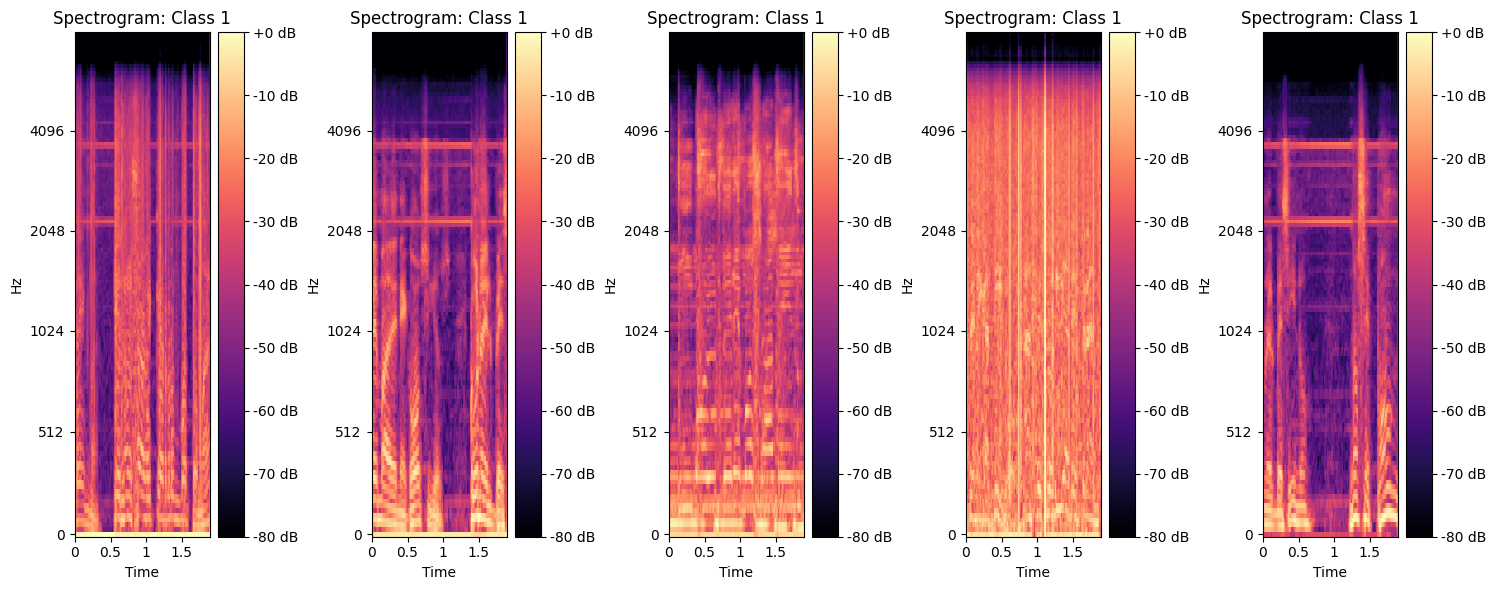

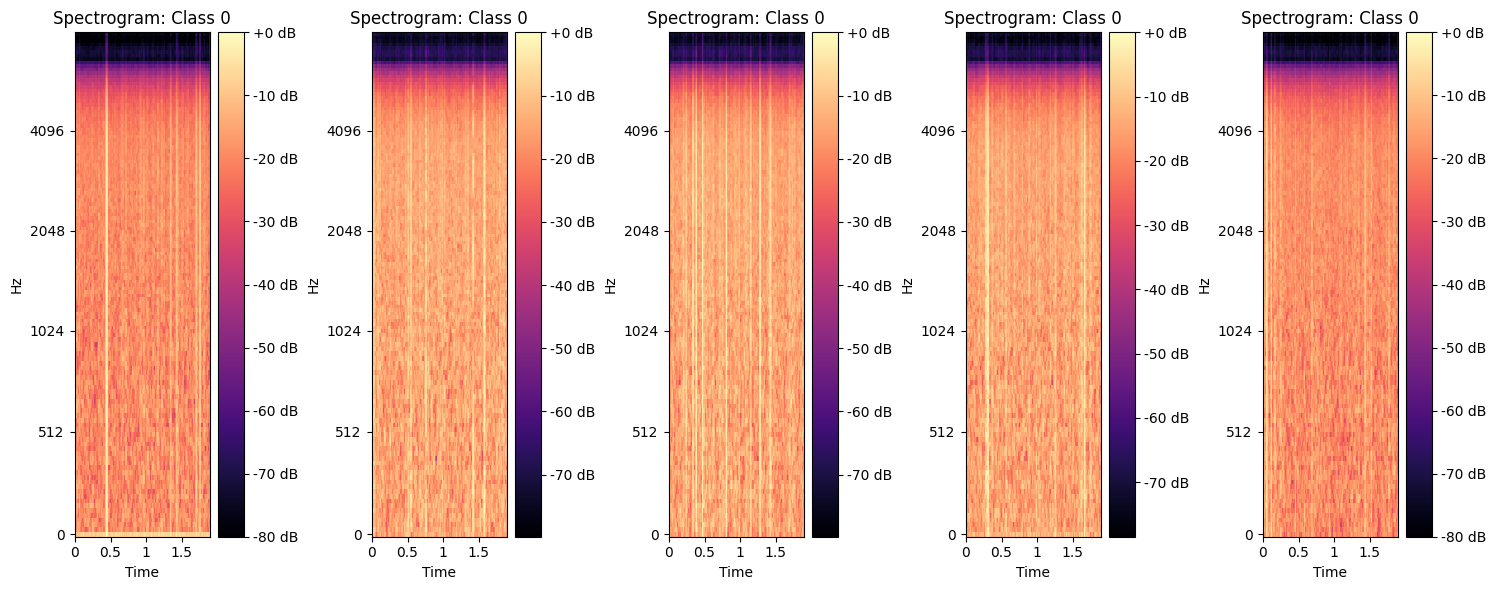

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


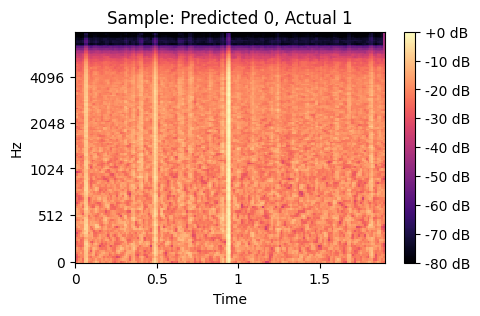

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


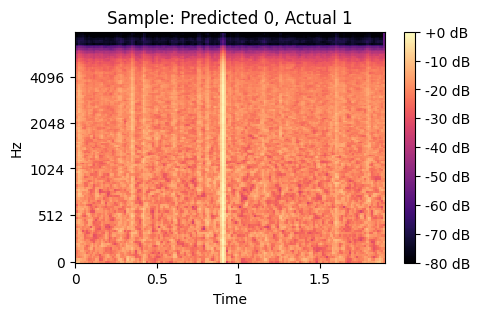

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


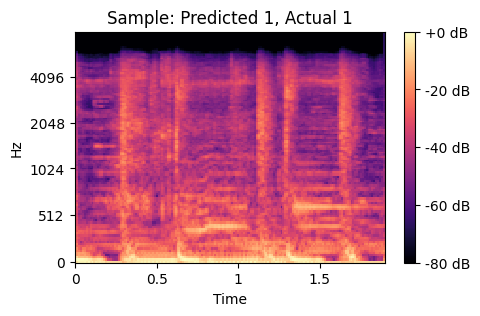

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


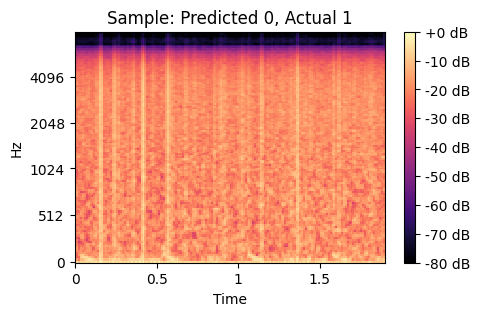

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


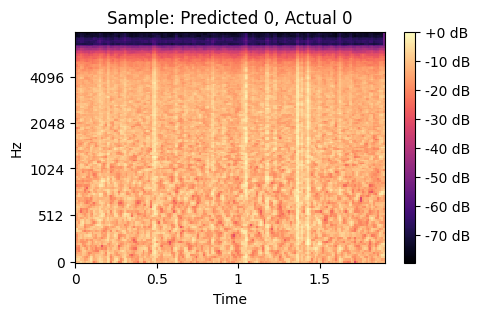

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


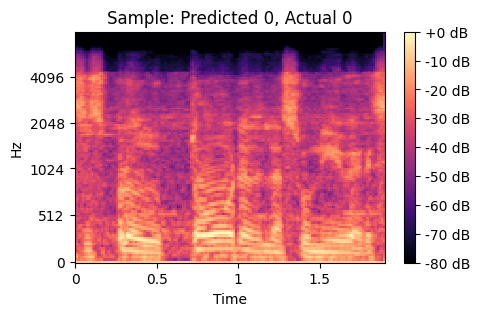

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


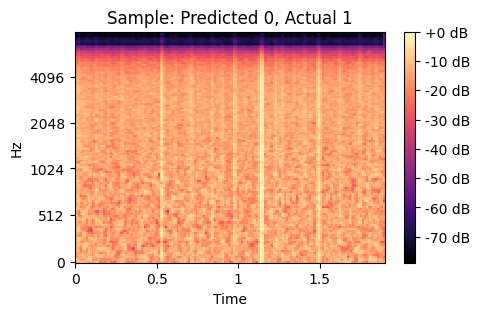

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


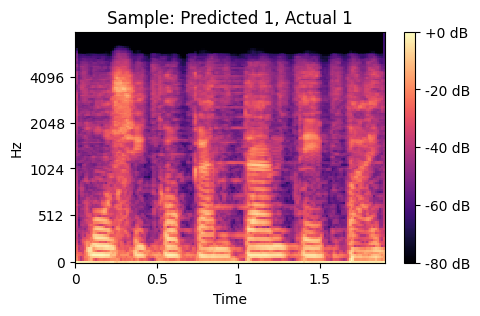

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


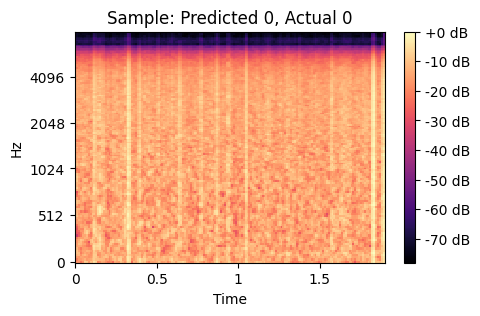

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


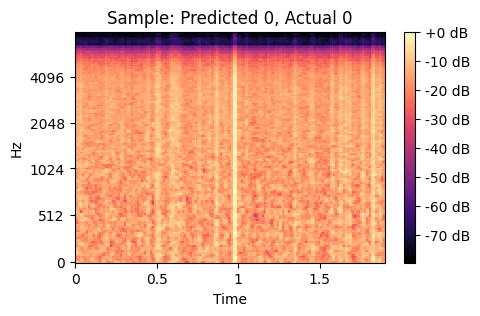

In [ ]:
# Imprimir 5 espectrogramas para cada clase
def plot_spectrograms(spectrograms, labels, class_label, num_samples=5):
    plt.figure(figsize=(15, 6))
    count = 0
    for i in range(len(labels)):
        if labels[i] == class_label and count < num_samples:
            plt.subplot(1, num_samples, count + 1)
            librosa.display.specshow(spectrograms[i, ..., 0], sr=fs, x_axis='time', y_axis='mel', fmax=8000)
            plt.title(f'Spectrogram: Class {class_label}')
            plt.colorbar(format='%+2.0f dB')
            count += 1
    plt.tight_layout()
    plt.show()

# Llamar a la función para imprimir espectrogramas de clase 1 y 0
plot_spectrograms(spectrograms, labels, class_label=1)
plot_spectrograms(spectrograms, labels, class_label=0)

# Testear 10 casos con el modelo
sample_indices = np.random.choice(len(X_test), 10, replace=False)  # Cambiar a 10
for index in sample_indices:
    sample = X_test[index]
    sample_reshaped = sample[np.newaxis, ...]  # Añadir dimensión para el batch
    prediction = model.predict(sample_reshaped)
    predicted_label = 1 if prediction[0][0] > 0.5 else 0
    actual_label = y_test[index]

    plt.figure(figsize=(5, 3))
    librosa.display.specshow(sample[..., 0], sr=fs, x_axis='time', y_axis='mel', fmax=8000)
    plt.title(f'Sample: Predicted {predicted_label}, Actual {actual_label}')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


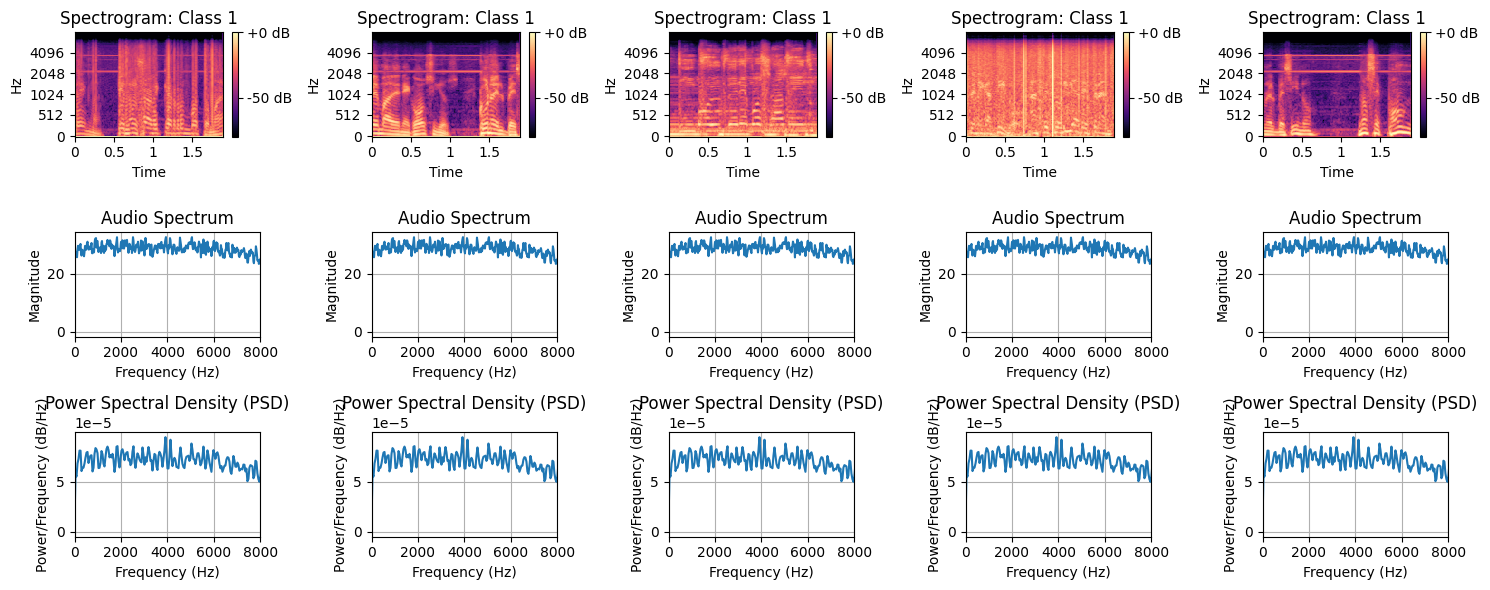

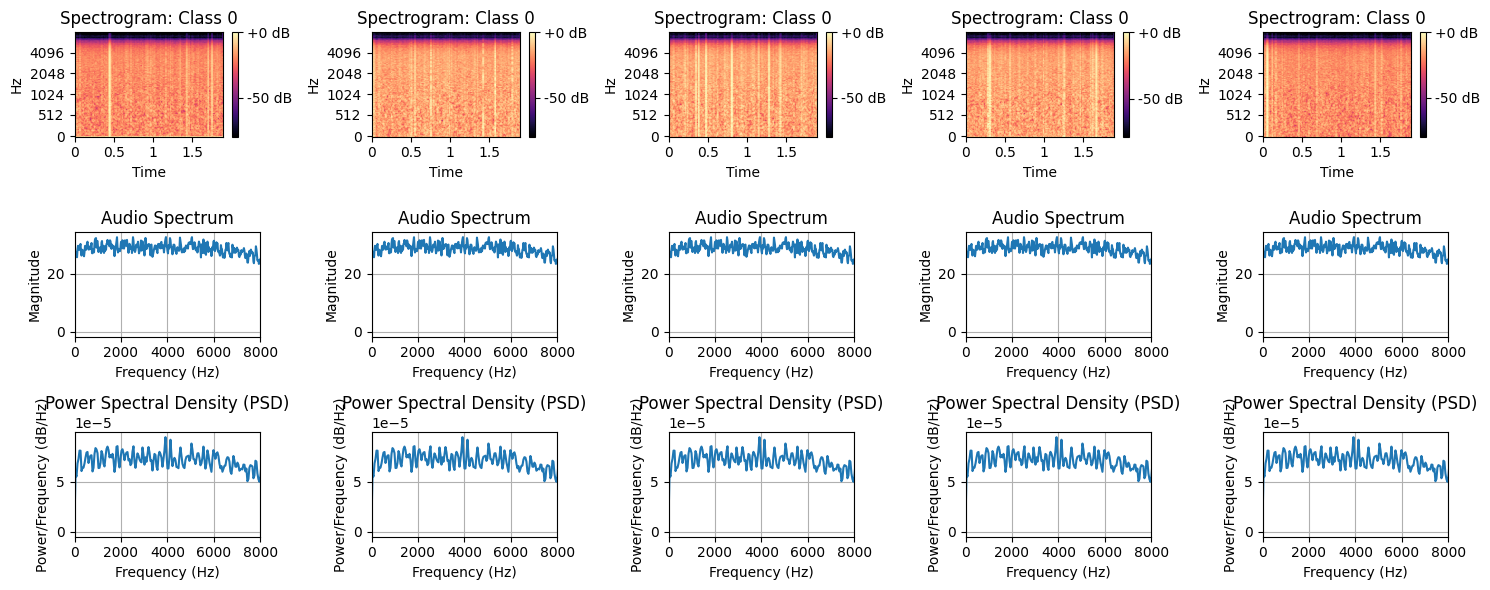

In [ ]:
import scipy.signal as sig
# Imprimir 5 espectrogramas y PSD como gráficos de líneas
def plot_spectrograms_and_psd(spectrograms, labels, class_label, num_samples=5):
    plt.figure(figsize=(15, 6))
    count = 0
    for i in range(len(labels)):
        if labels[i] == class_label and count < num_samples:
            # Espectrograma
            plt.subplot(3, num_samples, count + 1)
            librosa.display.specshow(spectrograms[i, ..., 0], sr=fs, x_axis='time', y_axis='mel', fmax=8000)
            plt.title(f'Spectrogram: Class {class_label}')
            plt.colorbar(format='%+2.0f dB')

            # Espectro de audio
            plt.subplot(3, num_samples, num_samples + count + 1)
            y, sr = librosa.load(os.path.join(path, row['Nombre '].strip()), sr=None)
            D = librosa.stft(y)
            magnitude = np.abs(D).mean(axis=1)  # Promedio de magnitud
            frequencies = np.linspace(0, sr/2, len(magnitude))  # Frecuencias correspondientes
            plt.plot(frequencies, magnitude)
            plt.title('Audio Spectrum')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Magnitude')
            plt.xlim(0, 8000)  # Limitar el eje x a 8000 Hz
            plt.grid()

            # Densidad Espectral de Potencia (PSD)
            plt.subplot(3, num_samples, 2 * num_samples + count + 1)
            f, Pxx = sig.welch(y, fs, nperseg=1024)
            plt.plot(f, Pxx)
            plt.title('Power Spectral Density (PSD)')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Power/Frequency (dB/Hz)')
            plt.xlim(0, 8000)  # Limitar el eje x a 8000 Hz
            plt.grid()

            count += 1
    plt.tight_layout()
    plt.show()

# Llamar a la función para imprimir espectrogramas y PSD para clase 1 y 0
plot_spectrograms_and_psd(spectrograms, labels, class_label=1)
plot_spectrograms_and_psd(spectrograms, labels, class_label=0)






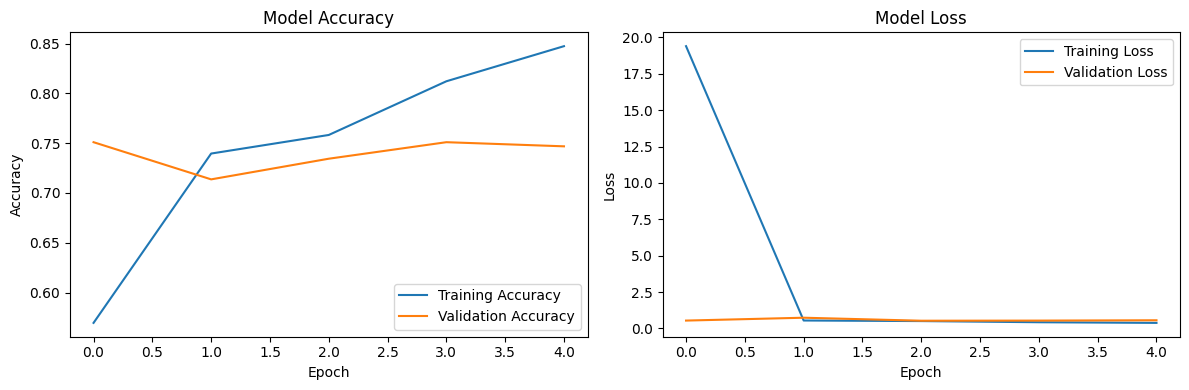

In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Graficar la precisión del modelo
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')

# Mostrar los gráficos
plt.tight_layout()
plt.show()
